<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

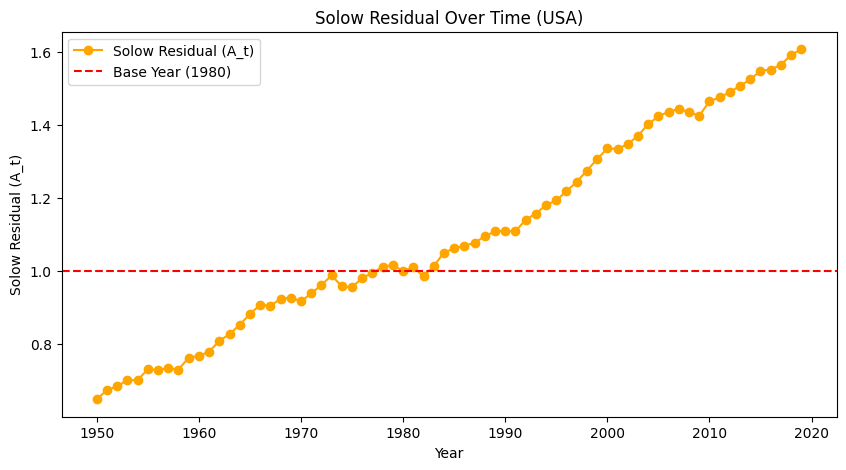

In [3]:
###Part 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file (adjust file path as necessary)
file_path = "C:/Users/Jonbf5/OneDrive - University of Cincinnati/Classes/ECON8030 Macro Theory/Group Projects/Project 2 - Solow Model/Penn Data Proj 2.xlsx"

# Load the 4th sheet (index 3, since Python uses zero-based indexing)
sheet_name = 3
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Select the relevant columns
df_filtered = df[['countrycode', 'year', 'rgdpo', 'rnna', 'rtfpna', 'labsh', 'emp']]

# Filter for the selected country 
country_code = "USA"
df_country = df_filtered[df_filtered['countrycode'] == country_code].copy()

# Drop rows with missing values in key columns
df_country.dropna(subset=['rgdpo', 'rnna', 'emp'], inplace=True)

# Compute log values
df_country['log_Y'] = np.log(df_country['rgdpo'])
df_country['log_K'] = np.log(df_country['rnna'])
df_country['log_L'] = np.log(df_country['emp'])

# Compute log(A_t) using the Solow residual formula
alpha = 0.3
df_country['log_A'] = df_country['log_Y'] - (alpha * df_country['log_K']) - ((1 - alpha) * df_country['log_L'])

# Normalize A_t to 1 in the base year (1980)
base_year = 1980
A_base = df_country[df_country['year'] == base_year]['log_A'].values[0]
df_country['A_t'] = np.exp(df_country['log_A'] - A_base)  # Convert back from log scale

# Plot A_t over time
plt.figure(figsize=(10, 5))
plt.plot(df_country['year'], df_country['A_t'], marker='o', linestyle='-', label="Solow Residual (A_t)", color="orange")
plt.axhline(y=1, color='r', linestyle='--', label="Base Year (1980)")
plt.xlabel("Year")
plt.ylabel("Solow Residual (A_t)")
plt.title("Solow Residual Over Time (USA)")
plt.legend()
plt.grid


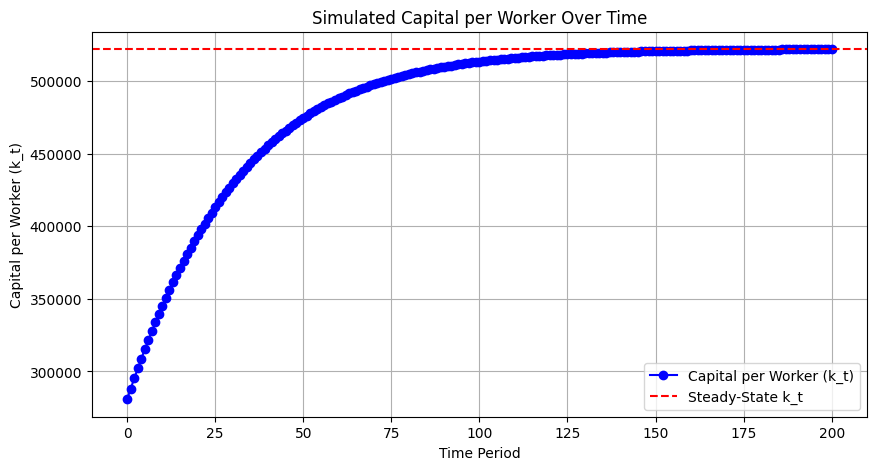

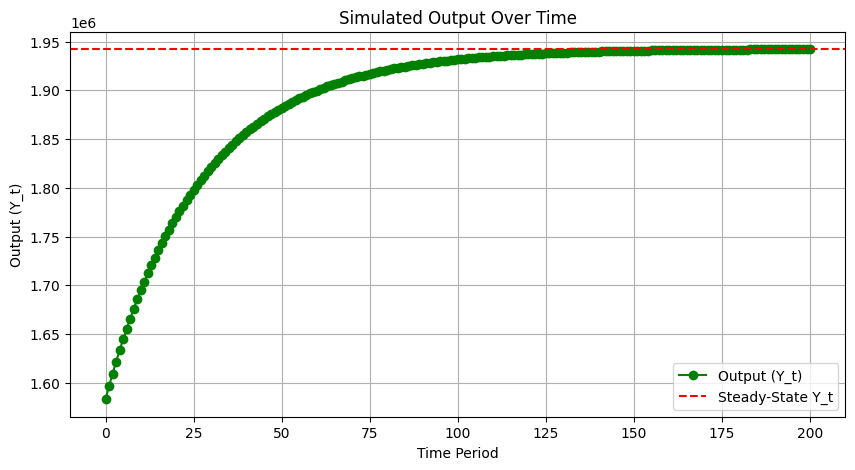

In [5]:
###Part 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/Jonbf5/OneDrive - University of Cincinnati/Classes/ECON8030 Macro Theory/Group Projects/Project 2 - Solow Model/Penn Data Proj 2.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Data")

# Filter data for the USA
df_usa = df[df["countrycode"] == "USA"].copy()

# Select relevant columns
columns_of_interest = ["year", "rgdpo", "rnna", "emp"]
df_usa = df_usa[columns_of_interest].dropna()  # Drop missing values

# Step 1: Calibration - Choose Base Year (1980)
base_year = 1980
df_base = df_usa[df_usa["year"] == base_year]

# Extract base year values
K_0 = df_base["rnna"].values[0]  # Capital stock
L_0 = df_base["emp"].values[0]  # Labor force
k_0 = K_0 / L_0  # Initial capital per worker


# Assumed/derived parameters
s = 0.3  # Savings rate (assumed based on economic data)
alpha = 0.33  # Capital elasticity (standard assumption)
delta = 0.05  # Depreciation rate (estimated from BEA sources)
A_0 = df_base["rgdpo"].values[0] / (K_0 ** alpha * L_0 ** (1 - alpha))  # Solow residual A_t


# Step 2: Simulate Capital Per Worker Path
T = 200  # Number of periods to simulate
k_t = k_0
k_path = [k_t]
A_t = A_0  # Initial productivity


for t in range(T):
    k_t1 = s * A_t * (k_t ** alpha) + (1 - delta) * k_t  # Solow equation
    k_path.append(k_t1)
    k_t = k_t1  # Update capital stock

# Step 3: Compute Output Path
Y_path = [A_0 * (k ** alpha) * (L_0 ** (1 - alpha)) for k in k_path]

# Plot Capital per Worker Over Time
plt.figure(figsize=(10, 5))
plt.plot(range(T + 1), k_path, marker="o", linestyle="-", label="Capital per Worker (k_t)", color="blue")
plt.axhline(y=k_path[-1], color="r", linestyle="--", label="Steady-State k_t")
plt.xlabel("Time Period")
plt.ylabel("Capital per Worker (k_t)")
plt.title("Simulated Capital per Worker Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Plot Output Over Time
plt.figure(figsize=(10, 5))
plt.plot(range(T + 1), Y_path, marker="o", linestyle="-", label="Output (Y_t)", color="green")
plt.axhline(y=Y_path[-1], color="r", linestyle="--", label="Steady-State Y_t")
plt.xlabel("Time Period")
plt.ylabel("Output (Y_t)")
plt.title("Simulated Output Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Compare with Historical Data
df_usa_filtered = df_usa[df_usa["year"] >= base_year].copy()
df_usa_filtered["sim_k_t"] = k_path[:len(df_usa_filtered)]
df_usa_filtered["sim_Y_t"] = Y_path[:len(df_usa_filtered)]




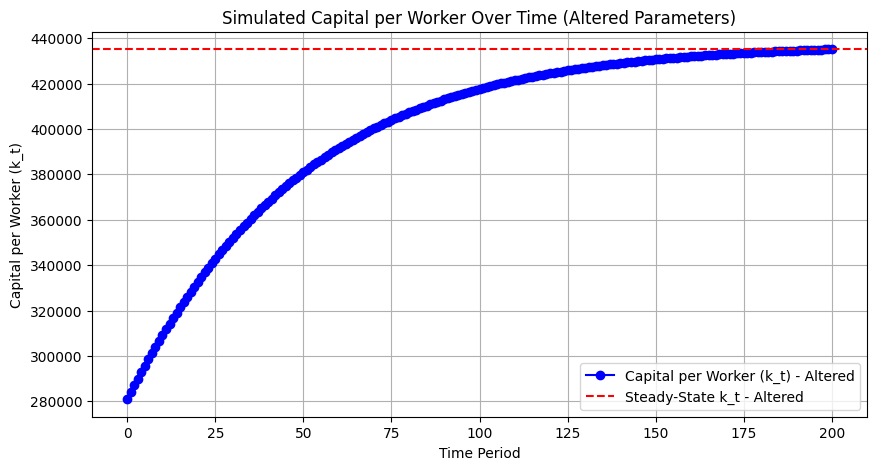

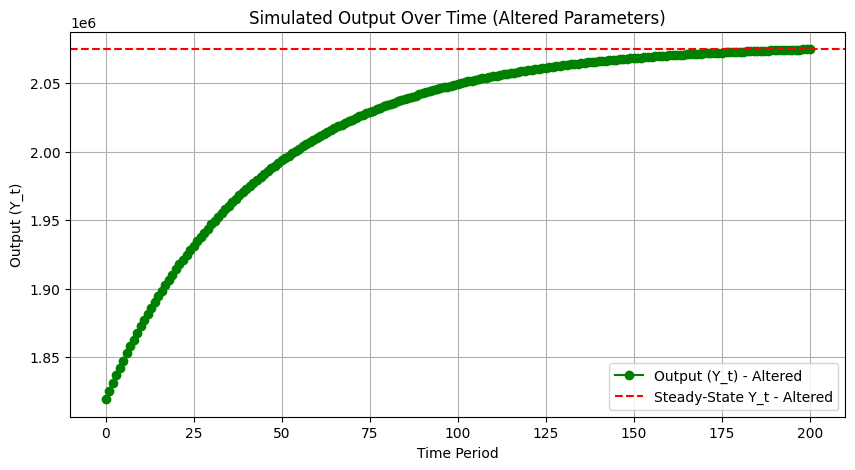

In [6]:
###Part 2.2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
file_path = "C:/Users/Jonbf5/OneDrive - University of Cincinnati/Classes/ECON8030 Macro Theory/Group Projects/Project 2 - Solow Model/Penn Data Proj 2.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Data")

# Filter data for the USA
df_usa = df[df["countrycode"] == "USA"].copy()

# Select relevant columns
columns_of_interest = ["year", "rgdpo", "rnna", "emp"]
df_usa = df_usa[columns_of_interest].dropna()  # Drop missing values

# Define altered parameters
s1, alpha1, delta1 = 0.25, 0.30, 0.03  # Lowered savings rate, capital elasticity, and depreciation rate

# Set base year and retrieve initial values
base_year = 1980
df_base = df_usa[df_usa["year"] == base_year]
K_0 = df_base["rnna"].values[0]  # Initial capital stock
L_0 = df_base["emp"].values[0]  # Initial labor force
k_0 = K_0 / L_0  # Initial capital per worker

# Compute the adjusted Solow residual (A_t) using altered alpha
df_usa["A_t_alt"] = df_usa["rgdpo"] / (df_usa["rnna"] ** alpha1 * df_usa["emp"] ** (1 - alpha1))

# Compute steady-state capital per worker with altered parameters
df_usa["k_t_steady_alt"] = (s1 * df_usa["A_t_alt"] / delta1) ** (1 / (1 - alpha1))

# Compute steady-state output with altered parameters
df_usa["Y_t_steady_alt"] = df_usa["A_t_alt"] * (df_usa["k_t_steady_alt"] ** alpha1) * (df_usa["emp"] ** (1 - alpha1))

# Compute gap between actual GDP and simulated GDP under altered parameters
df_usa["Y_gap_alt"] = df_usa["rgdpo"] - df_usa["Y_t_steady_alt"]



# Compute base-year Solow residual under altered parameters
A_01 = df_base["rgdpo"].values[0] / (K_0 ** alpha1 * L_0 ** (1 - alpha1))

# Simulate capital per worker path under altered parameters
T = 200  # Number of periods to simulate
k_t_alt = k_0
k_path_alt = [k_t_alt]

for t in range(T):
    k_t1_alt = s1 * df_usa["A_t_alt"].iloc[0] * (k_t_alt ** alpha1) + (1 - delta1) * k_t_alt
    k_path_alt.append(k_t1_alt)
    k_t_alt = k_t1_alt

# Compute output path with altered parameters
Y_path_alt = [A_01 * (k ** alpha1) * (L_0 ** (1 - alpha1)) for k in k_path_alt]

# Plot Capital per Worker Over Time with Altered Parameters
plt.figure(figsize=(10, 5))
plt.plot(range(T + 1), k_path_alt, marker="o", linestyle="-", label="Capital per Worker (k_t) - Altered", color="blue")
plt.axhline(y=k_path_alt[-1], color="r", linestyle="--", label="Steady-State k_t - Altered")
plt.xlabel("Time Period")
plt.ylabel("Capital per Worker (k_t)")
plt.title("Simulated Capital per Worker Over Time (Altered Parameters)")
plt.legend()
plt.grid(True)
plt.show()

# Plot Output Over Time with Altered Parameters
plt.figure(figsize=(10, 5))
plt.plot(range(T + 1), Y_path_alt, marker="o", linestyle="-", label="Output (Y_t) - Altered", color="green")
plt.axhline(y=Y_path_alt[-1], color="r", linestyle="--", label="Steady-State Y_t - Altered")
plt.xlabel("Time Period")
plt.ylabel("Output (Y_t)")
plt.title("Simulated Output Over Time (Altered Parameters)")
plt.legend()
plt.grid(True)
plt.show()


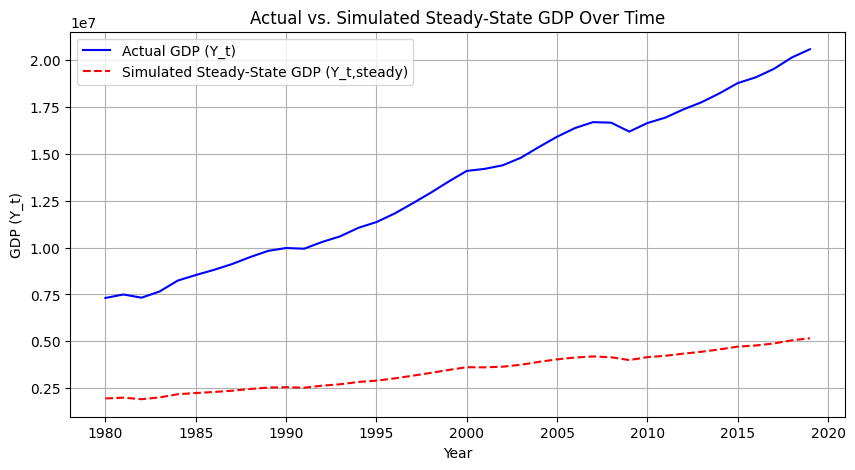

ModuleNotFoundError: No module named 'ace_tools'

In [7]:
###Part 3
# Step 1: Compute A_t for All Years Using the Cobb-Douglas Production Function
df_usa["A_t"] = df_usa["rgdpo"] / (df_usa["rnna"] ** alpha * df_usa["emp"] ** (1 - alpha))

# Step 2: Simulate the Steady-State Capital Path
k_steady = (s * df_usa["A_t"] / delta) ** (1 / (1 - alpha))

# Step 3: Compute Steady-State Output Using Simulated k_t,steady
Y_steady = df_usa["A_t"] * (k_steady ** alpha) * (df_usa["emp"] ** (1 - alpha))

# Step 4: Add to DataFrame for Comparison
df_usa["k_t_steady"] = k_steady
df_usa["Y_t_steady"] = Y_steady

# Step 5: Compare with Actual GDP (Y_t)
df_usa_filtered = df_usa[df_usa["year"] >= base_year].copy()
df_usa_filtered["Y_gap"] = df_usa_filtered["rgdpo"] - df_usa_filtered["Y_t_steady"]

# Step 6: Plot Actual vs. Simulated GDP
plt.figure(figsize=(10, 5))
plt.plot(df_usa_filtered["year"], df_usa_filtered["rgdpo"], label="Actual GDP (Y_t)", color="blue")
plt.plot(df_usa_filtered["year"], df_usa_filtered["Y_t_steady"], label="Simulated Steady-State GDP (Y_t,steady)", color="red", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("GDP (Y_t)")
plt.title("Actual vs. Simulated Steady-State GDP Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Display Results in Table
import ace_tools as tools  # Tool to display data
tools.display_dataframe_to_user(name="Steady-State vs. Actual Output", dataframe=df_usa_filtered[["year", "rgdpo", "Y_t_steady", "Y_gap"]])
